In [41]:
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [43]:
# ------------------------ Input Reading Function ------------------------

def read_input_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.read().splitlines()

    m, n = map(int, lines[0].split())
    k = int(lines[1])
    obstacles = [tuple(map(int, lines[i + 2].split())) for i in range(k)]

    c = int(lines[k + 2])
    terrain_costs = {}
    for i in range(c):
        x, y, cost = map(int, lines[k + 3 + i].split())
        terrain_costs[(x, y)] = cost

    start = tuple(map(int, lines[k + 3 + c].split()))
    goal = tuple(map(int, lines[k + 4 + c].split()))

    return (m, n), set(obstacles), terrain_costs, start, goal

In [45]:
# ------------------------ A* Algorithm ------------------------

def heuristic(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def get_neighbors(node, grid_size):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)] 
    neighbors = []
    for dx, dy in directions:
        nx, ny = node[0] + dx, node[1] + dy
        if 0 <= nx < grid_size[0] and 0 <= ny < grid_size[1]:
            neighbors.append((nx, ny))
    return neighbors

def a_star_search(grid_size, start, goal, obstacles, terrain_costs):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start, [start]))

    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path, g

        for neighbor in get_neighbors(current, grid_size):
            if neighbor in obstacles or neighbor in visited:
                continue

            base_cost = terrain_costs.get(neighbor, 1)
            diagonal = (abs(neighbor[0] - current[0]) == 1 and abs(neighbor[1] - current[1]) == 1)
            move_cost = 1.4 * base_cost if diagonal else base_cost
            new_g = g + move_cost
            new_f = new_g + heuristic(neighbor, goal)

            heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

    return None, float('inf')

In [47]:
# ------------------------ Visualization ------------------------

def draw_grid(grid_size, path, obstacles, terrain_costs, start, goal):
    fig, ax = plt.subplots(figsize=(6, 6))
    m, n = grid_size

    for i in range(m):
        for j in range(n):
            rect = patches.Rectangle((j, m - i - 1), 1, 1, linewidth=1,
                                     edgecolor='gray', facecolor='white')
            ax.add_patch(rect)

            if (i, j) in terrain_costs:
                rect = patches.Rectangle((j, m - i - 1), 1, 1, linewidth=1,
                                         edgecolor='gray', facecolor='#cce6ff')
                ax.add_patch(rect)
                ax.text(j + 0.5, m - i - 0.5, f"cost={terrain_costs[(i, j)]}", 
                        color='black', ha='center', va='center', fontsize=8)

            if (i, j) in obstacles:
                rect = patches.Rectangle((j, m - i - 1), 1, 1, linewidth=1,
                                         edgecolor='gray', facecolor='#ff6659')
                ax.add_patch(rect)
                ax.text(j + 0.5, m - i - 0.5, "Obstacle", 
                        color='white', ha='center', va='center', fontsize=8)

    for idx in range(len(path) - 1):
        x1, y1 = path[idx][1] + 0.5, m - path[idx][0] - 0.5
        x2, y2 = path[idx + 1][1] + 0.5, m - path[idx + 1][0] - 0.5
        ax.plot([x1, x2], [y1, y2], 'green', linewidth=3)
        ax.plot(x1, y1, 'go', markersize=6)

    # Draw start and goal
    sx, sy = start[1] + 0.5, m - start[0] - 0.5
    gx, gy = goal[1] + 0.5, m - goal[0] - 0.5
    ax.plot(sx, sy, 'go', markersize=16)
    ax.plot(gx, gy, 'ro', markersize=16)

    # Legend
    legend_elements = [
        patches.Patch(color='green', label='Path'),
        patches.Patch(color='#ff6659', label='Obstacle'),
        patches.Patch(color='#cce6ff', label='Special Terrain'),
    ]
    ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0.1))
    
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_xticks(range(n + 1))
    ax.set_yticks(range(m + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()


Path: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (13, 13)]
Total Cost: 18.8


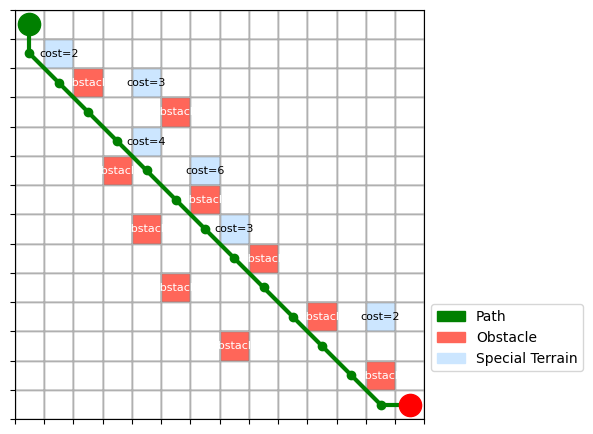

In [49]:
file_path = "input_file.txt"

grid_size, obstacles, terrain_costs, start, goal = read_input_file(file_path)
path, total_cost = a_star_search(grid_size, start, goal, obstacles, terrain_costs)

print("Path:", path)
print("Total Cost:", round(total_cost, 2))

draw_grid(grid_size, path, obstacles, terrain_costs, start, goal)